# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

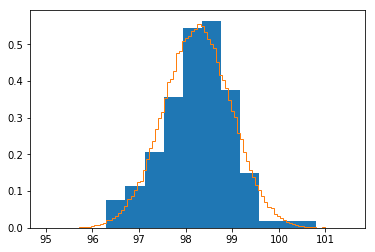

98.24923076923078 0.7303577789050377


In [9]:
# Your work here.

# 1 - temperatures appear to be normally distributed
#     Histogram of data with a normal PDF taken with samples having same mean and std
#     Wilks Shapiro test also shows normality
np.random.seed(42)

temps_mean = np.mean(df['temperature'])

temps_std = np.std(df['temperature'])

temp_samples = np.random.normal(temps_mean, temps_std, 100000)

plt.hist(df['temperature'], bins=11, density=True)

plt.hist(temp_samples, bins=100, density=True, histtype='step')

plt.show()
print(temps_mean, temps_std)

In [5]:
from scipy import stats

stats.shapiro(df['temperature'])


(0.9865769743919373, 0.2331680953502655)

In [ ]:
# 2 Sample size is small enough so that 10% rule applies to assume independence.

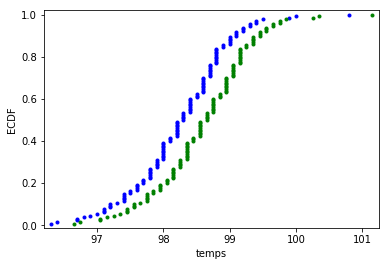

In [10]:
# 3 Is the true population mean really 98.6 degrees F?
#    First, try a bootstrap hypothesis test.
#    Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
#    In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
#    Now try using the other test. How is the result be different? Why?

# Clearly state hypothesis
# Define test statistic
# Generate many sets of simulated data assuming null hyp is true
# compute the test statistic for each simulated data set
# The p-value is the fraction of your simulated data sets for which 
#  the test statistic is at least as extreme as for the real data

# Nul Hypothesis statement:
# The true mean temp of the population is 98.6

# first we shift the data to be the same shape but have a mean of 98.6
temps = df['temperature']

carl_value = 98.6

temps_shifted = temps - temps_mean + carl_value

# make an ECDF with the original and shifted temp data

x1 = np.sort(temps)
x2 = np.sort(temps_shifted)

y = np.arange(1, len(x1)+1) / len(x1)

plt.plot(x1, y, marker='.', color='blue', linestyle='none')
plt.plot(x2, y, marker='.', color='green', linestyle='none')
plt.xlabel('temps')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()


In [11]:
# The test statistic is mean of sample minus carl's value

 

def bootstrap_replicate_1d(data, func):
    """generate bootstrap replicate of 1D data"""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)



def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def diff_from_carl(data, carl_value=98.6):
    return np.mean(data) - carl_value

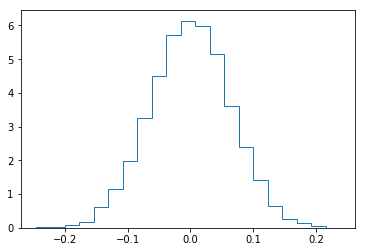

In [12]:
bs_replicates = draw_bs_reps(temps_shifted, diff_from_carl, size=10000)

plt.hist(bs_replicates, density=True, bins=21, histtype='step')
plt.show()

In [14]:
diff_observed = diff_from_carl(temps)

p_value = np.sum(bs_replicates <= diff_observed) / 10000

print(diff_observed)
print(p_value)

-0.35076923076921673
0.0


In [104]:
# Extremely unlikely that our sample mean differed from carls value
# by 0.35, so we can easily reject null hypothesis



In [15]:
# Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
# ANSWER: One sample test, because we only have carl's mean and not his data, so we only have one sample to work with

# In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
# ANSWER t statistic because we do not know the population std, however, n=130 implies the t and z values will be similar 
print("temps_mean = " + str(temps_mean))
print("temps_std = " + str(temps_std))



temps_mean = 98.24923076923078
temps_std = 0.7303577789050377


In [22]:
# Null Hypothosis: True mean is 98.6, carls value

def t_stat(sample_mean, sample_std, n, hyp_mean):
    return (sample_mean - hyp_mean) / (sample_std / np.sqrt(n))

print("t value for sample temps = " + str(t_stat(temps_mean, temps_std, 130, 98.6)))

print("degrees of freedom = 129")



t value for sample temps = -5.475925202078116
degrees of freedom = 129


In [ ]:
# The corresponding p-value for t = -5.476 and df = 129
# is off the chart so < .0005

# Therefore we reject the null hypothesis and conclude that
# carls value is not the true mean



In [ ]:
# Now try using the other test. How is the result be different? Why?

# Using the other test simply means looking up the critical value
# on a z table vs a t table, and we still get a p < .0002.
# The differecne is small due to large sample size of 130.


In [ ]:
# Draw a small sample of size 10 from the data and 
# repeat both frequentist tests.
# Which one is the correct one to use?
# What do you notice? What does this tell you about the 
# difference in application of the  𝑡  and  𝑧  statistic?

In [21]:
rand_10_temps = np.random.choice(temps, 10)
rand_10_temps

array([98.4, 98.3, 99.1, 98.2, 99.1, 98.1, 98.6, 98.8, 98.3, 97.8])

In [20]:
rand_10_mean = np.mean(rand_10_temps)
rand_10_std = np.std(rand_10_temps)

print("t value for rand_10_temps = " + (
    str(t_stat(rand_10_mean, rand_10_std, 10, 98.6))))

t value for rand_10_temps = -0.19280747181994531


In [ ]:
# t = 2.457 and df = 9 corresponds to a p-value 
# between .02 and .01 so we can still reject null hypothosis,
# although with less gusto
# a z table tells us that p is between .0069 and .0071
# clearly a z score gives more confidence but both seem to show
# enough confidence in this case that we can reject the null with both z and t

# QUESTION: to calculate the z score from the small sample of
# the the original sample, should I use the small sample std,
# or the larger sample one?? to calculate z, we are supposed 
# to use the pop std, so does the larger sample count as the 
# 'population' in this case?

In [ ]:
# At what temperature should we consider someone's temperature to be "abnormal"?
# As in the previous example, try calculating everything using the boostrap approach, 
# as well as the frequentist approach.
# Start by computing the margin of error and confidence interval. 
# When calculating the confidence interval, keep in mind that you should use the 
# appropriate formula for one draw, and not N draws.

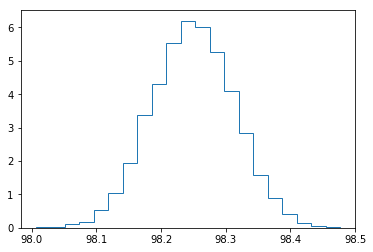

In [24]:
# Bootstrap 95% confidence interval of temp data
temps_replicates = draw_bs_reps(temps, np.mean, size=10000)

plt.hist(temps_replicates, density=True, bins=21, histtype='step')
plt.show()


In [47]:
t_star = 2 #t value corresponding to 95% ci on table, also reprisents 2 standard deviations away from the mean 67 95 99 rule

p_value = np.sum(np.absolute(temps_replicates - temps_mean) <= t_star*temps_std/np.sqrt(130)) / 10000

p_value

0.9567

In [48]:
interval_95 = [temps_mean - t_star*temps_std/np.sqrt(130), temps_mean + t_star*temps_std/np.sqrt(130)]
interval_95

[98.12111753984038, 98.37734399862117]

In [ ]:
#Is there a significant difference between males and females in normal temperature?
#What testing approach did you use and why?
#Write a story with your conclusion in the context of the original problem.

In [50]:
df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0
